In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Recall that Matplotlib expects the images in a different RGB ordering vs BGR in OpenCV, so if we use OpenCV to calculate anything channel oriented, we'll want to make sure we keep the original RGB ordering, however if we ever want to display the image, then we'll need to convert to the RGB ordering that matplotlib wants.

In [5]:
# kita bakalan import 2 jenis dari tiap gambar
# yg di convert sama yg ga di convert

dark_horse = cv2.imread('/Users/clcx/Documents/GitHub/OpenCv-Deep-Learning/Pierian/DATA/horse.jpg')
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread('/Users/clcx/Documents/GitHub/OpenCv-Deep-Learning/Pierian/DATA/rainbow.jpg')
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('/Users/clcx/Documents/GitHub/OpenCv-Deep-Learning/Pierian/DATA/bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

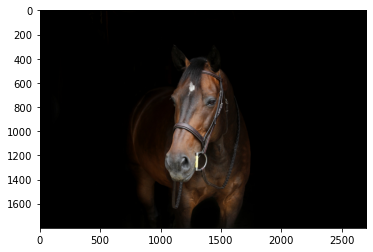

In [6]:
plt.imshow(show_horse)

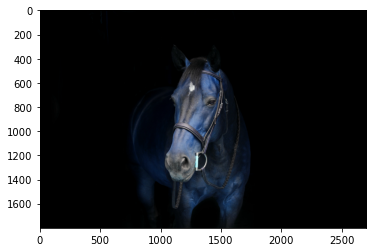

In [7]:
plt.imshow(dark_horse)

### OpenCV Histogram

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

* images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, “[img]”.
* channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
* mask : mask image. To find histogram of full image, it is given as “None”. But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
* histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
* ranges : this is our RANGE. Normally, it is [0,256].

In [9]:
# kita coba liat histogram gambar blue bricks
# BGR [0][1][2], kita mau cek channel biru jadi 0
hist_values = cv2.calcHist([blue_bricks],channels=[0],mask=None,histSize=[256],ranges=[0,256])

In [10]:
hist_values.shape

(256, 1)

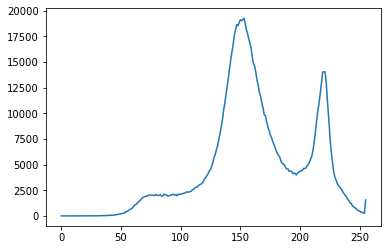

In [11]:
# x nya itu value Blue nya
# y nya itu jumlah pixelnya
plt.plot(hist_values)

In [30]:
# skrg kita coba dark horse
hist_values = cv2.calcHist([dark_horse],channels=[0],mask=None,histSize=[256],ranges=[0,256])

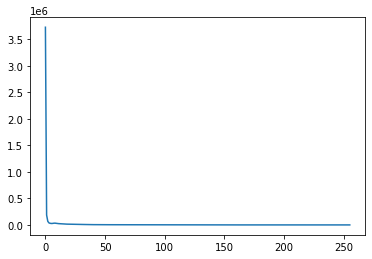

In [31]:
# channel biru nya dikit banget, bahkan channel warna lain jg
# soalnya hampir kebanyakan item
plt.plot(hist_values)

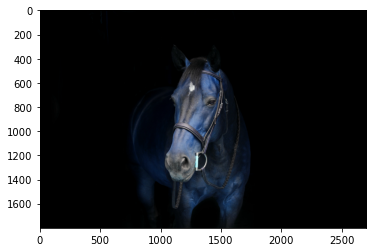

In [32]:
plt.imshow(dark_horse)

### Plotting 3 Color Histograms
tadi kan 1 channel warna, skrg langsung 3

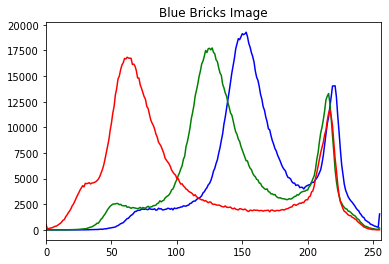

In [33]:
img = blue_bricks
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Blue Bricks Image')
plt.show()

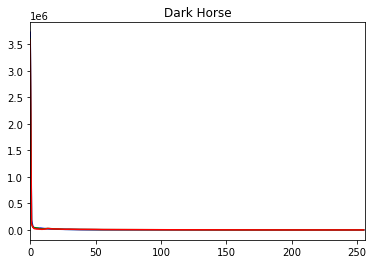

In [34]:
img = dark_horse
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Dark Horse')
plt.show()

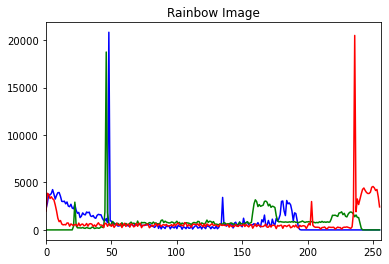

In [35]:
img = rainbow
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Rainbow Image')
plt.show()

### Masking
mask itu buat ROI, buat region tertentu yang kita mau aja

In [36]:
# kita pake contoh rainbow
img = rainbow

In [38]:
img.shape

(550, 413, 3)

In [39]:
# kita mau bikin mask didalem area sizenya
# masknya kita ambil size img nya dulu
# abis itu pake numpy slicing di putihin part yg kita mau
mask = np.zeros(img.shape[:2],np.uint8)
mask[300:400,100:400] = 255

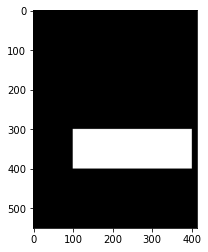

In [40]:
plt.imshow(mask,cmap='gray')

In [41]:
# skrg baru kita buat masknya pake mask tadi
masked_img = cv2.bitwise_and(img,img,mask=mask)
show_masked_img = cv2.bitwise_and(show_rainbow,show_rainbow,mask=mask)

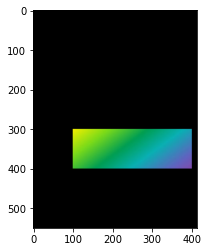

In [42]:
plt.imshow(show_masked_img)

In [43]:
# ini yang rainbow ada mask
hist_mask_values_red = cv2.calcHist([rainbow],channels=[2],mask=mask,histSize=[256],ranges=[0,256])
# ini yang original
hist_full_values_red = cv2.calcHist([rainbow],channels=[2],mask=None,histSize=[256],ranges=[0,256])

Text(0.5, 1.0, 'RED VALUE HISTOGRAM FULL IMAGE')

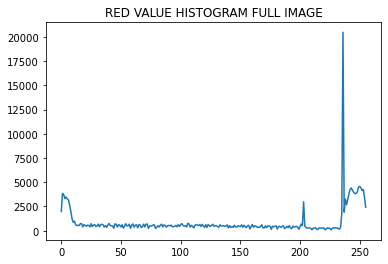

In [44]:
plt.plot(hist_full_values_red)
plt.title('RED VALUE HISTOGRAM FULL IMAGE')

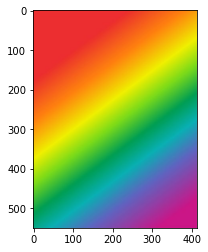

In [46]:
# bisa di liat emang banyak merahnya
plt.imshow(show_rainbow)

Text(0.5, 1.0, 'RED VALUE HISTOGRAM MASKED IMAGE')

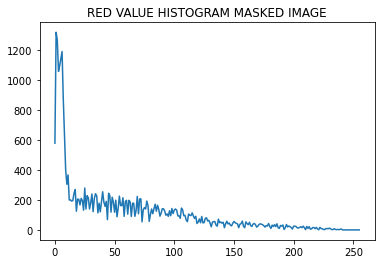

In [47]:
plt.plot(hist_mask_values_red)
plt.title('RED VALUE HISTOGRAM MASKED IMAGE')

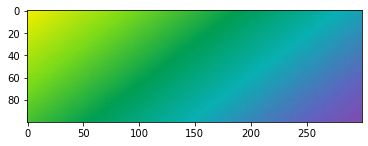

In [48]:
# emang hampir ga ada merahnya, dikit bgt
plt.imshow(show_masked_img[300:400,100:400])

## Histogram Equalization

In [53]:
# kita pake foto gorilla
gorilla = cv2.imread('/Users/clcx/Documents/GitHub/OpenCv-Deep-Learning/Pierian/DATA/gorilla.jpg',0)

In [50]:
# buat function display
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

## Single Channel (Grayscale)

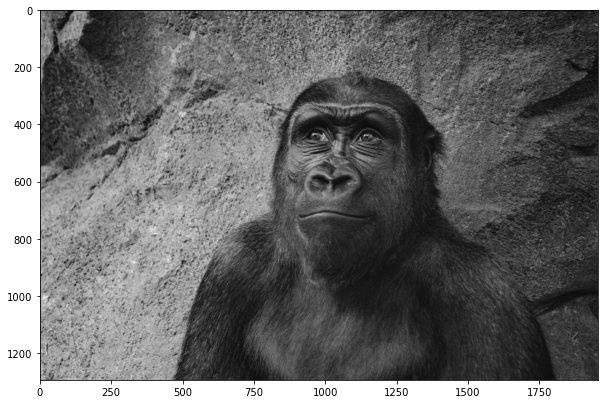

In [54]:
display(gorilla,cmap='gray')

In [55]:
hist_values = cv2.calcHist([gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])

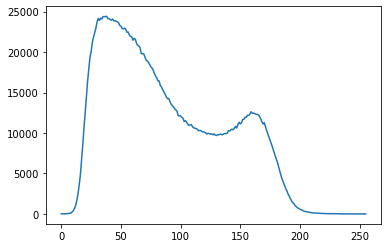

In [56]:
plt.plot(hist_values)

In [57]:
# skrg kita equalize gambarnya
eq_gorilla = cv2.equalizeHist(gorilla)

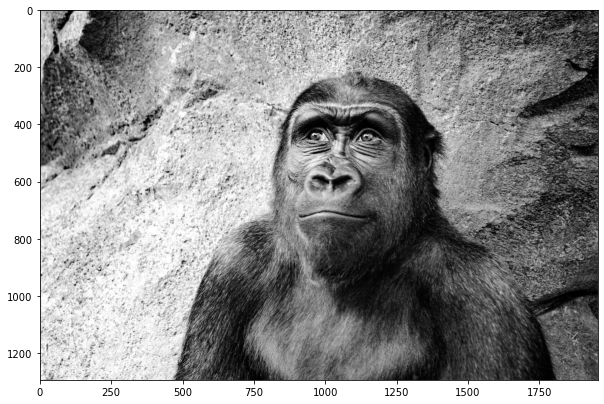

In [58]:
# bisa diliat kontrasnya jd lebih gede, lebih terang
display(eq_gorilla,cmap='gray')

In [59]:
hist_values = cv2.calcHist([eq_gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])

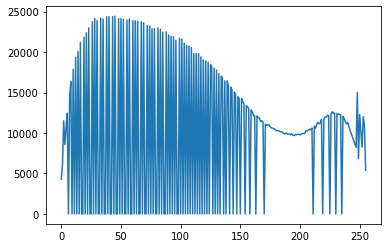

In [60]:
# bisa di liat bedanya sama yang sebelumnya
# sebelumnya pas turun dari puncaknya curam
# ini jadi lebih rata
plt.plot(hist_values)

## Color Images

HSV 3 channelnya itu Hue, Saturation, Value

In [61]:
color_gorilla = cv2.imread('/Users/clcx/Documents/GitHub/OpenCv-Deep-Learning/Pierian/DATA/gorilla.jpg')
show_gorilla = cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2RGB)
# skrg kita convert ke HSV colorspace
hsv = cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2HSV)

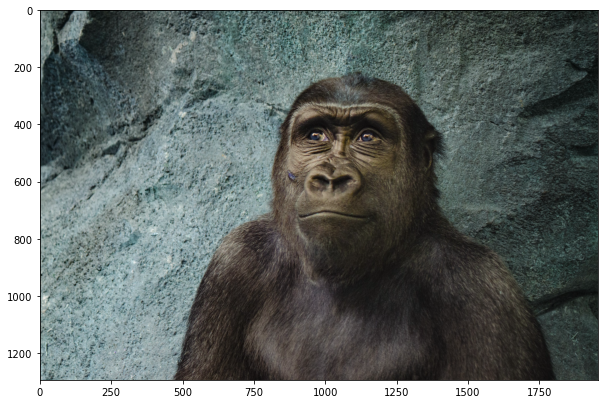

In [63]:
display(color_gorilla)

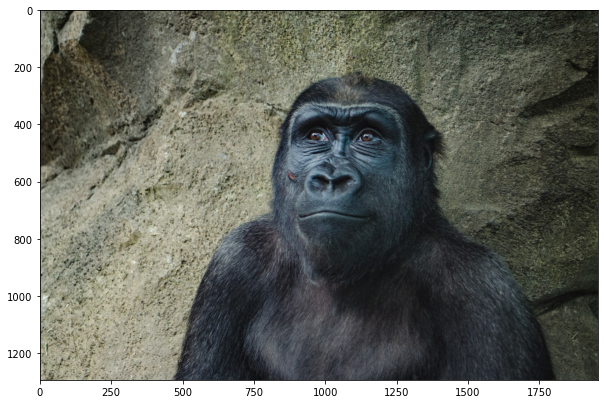

In [62]:
display(show_gorilla)

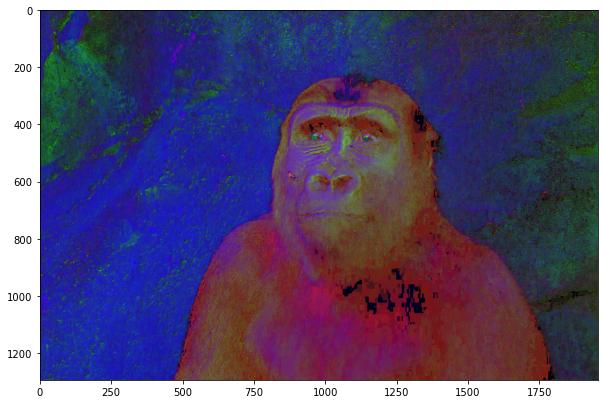

In [64]:
display(hsv)

In [65]:
# Grab V channel (ambil channel valuenya)
# hue-saturation-value [0][1][2]
hsv[:,:,2]

array([[127, 121, 115, ...,  43,  42,  42],
       [121, 124, 123, ...,  47,  49,  51],
       [118, 129, 131, ...,  47,  50,  53],
       ...,
       [196, 197, 184, ...,  55,  55,  55],
       [184, 185, 182, ...,  51,  52,  53],
       [173, 170, 173, ...,  49,  50,  50]], dtype=uint8)

In [66]:
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

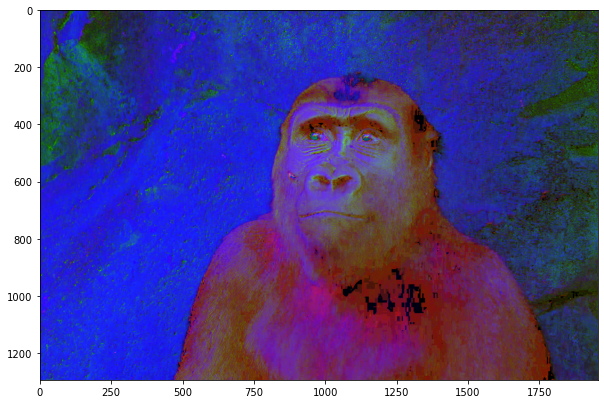

In [67]:
# jadi lebih terang
# tapi harus convert balik ke RGB
display(hsv)

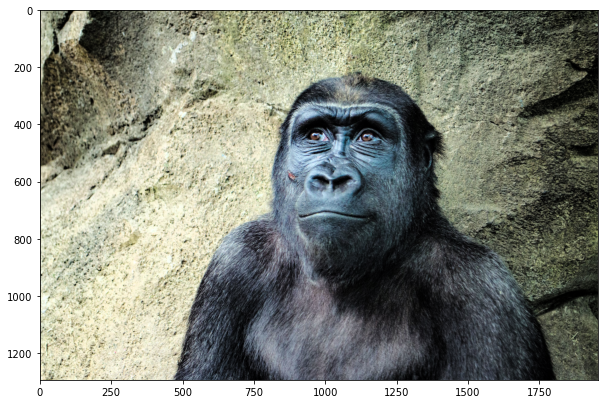

In [68]:
eq_color_gorilla = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)
display(eq_color_gorilla)